# TP1: Marker Detection on GR logs

Imane Elbacha 
imane.elbacha@etu.emse.fr

Marker detection in the context of wells refers to the identification of geological formations or other significant features within borehole logs. Borehole logs are measurements taken while drilling a well and typically include information about rock properties, such as porosity and density, as well as other information such as drilling mud properties.

Marker detection is important in the oil and gas industry because it allows geologists and engineers to identify and interpret the geologic features of the subsurface. This can inform decisions about well placement, drilling strategy, and production potential.

A plan for a coding project on marker detection in GR logs might include the following steps:

Data acquisition: Obtain a dataset of borehole logs that includes GR (gamma ray) logs. GR logs are a common type of borehole log that measures the natural radioactivity of the rock formations surrounding the borehole.

Data preprocessing: Clean and normalize the data to prepare it for analysis. This may involve removing outliers, smoothing the data, and scaling the values.

Feature extraction: Identify relevant features within the GR logs that may correspond to marker features. This could include peaks, valleys, or changes in slope.

Marker identification: Apply a machine learning algorithm or other pattern recognition technique to identify markers within the GR logs. This may involve training a model on a labeled dataset or using an unsupervised method such as clustering.

Visualization: Display the identified markers on a graph or image to facilitate interpretation and analysis. This could include overlaying the markers on a geological cross section or creating a 3D visualization of the subsurface.

Validation: Validate the results of the marker detection algorithm by comparing the identified markers to known geological features or by conducting further analysis, such as well testing or seismic interpretation.

Optimization: Fine-tune the algorithm to improve accuracy or efficiency, and explore ways to automate the process of marker detection.

Overall, the goal of a marker detection project on GR logs is to identify significant geological features within borehole logs and to use this information to improve well planning and production in the oil and gas industry.

>[TP1: Marker Detection on GR logs](#scrollTo=pGtdIPojLp5f)

>[0.Imports](#scrollTo=jfmWGWZe1s8d)

>>[0.1 Libraries](#scrollTo=LJOacgCV1zP5)

>>[0.2 Load data](#scrollTo=15NX8Kr7242h)

>[1 . Data set up](#scrollTo=NmadeVXnLp6E)

>>[1.1 Load logs](#scrollTo=7kZJQjOD6gx4)

>>[1.2 Load Locs](#scrollTo=GL-ALspe6lK1)

>>[1.3 Load Tops](#scrollTo=_lVqqQLm7zwl)

>>>[1.3.1 data analysis](#scrollTo=76dKzJTYCOeW)

>>>[1.3.2 Quality assesement](#scrollTo=M-aAjwU9CGsz)

>[2 . Datasets](#scrollTo=a1ir6RnvuFj-)

>[3.Models and evaluation](#scrollTo=7aYYLiZSyn9L)

>>[3.1 Linear regression](#scrollTo=rlFRi0b3ysh-)

>>[3.2 Comparing several regression models](#scrollTo=s7bmvlCWy0q6)

>>[3.4 Support vector machines](#scrollTo=Yv10I06lADqJ)

>>>[Predictions on Marcel](#scrollTo=iIhMi14SBMRP)

>>[3.3 simple neural network](#scrollTo=OBJhtlnv4mJ_)

>[4.Implement the inference](#scrollTo=RhJwsPURLp6m)



# 0.Imports 

## 0.1 Libraries

In [1]:
import random
import numpy as np  # For numerical computations
import pandas as pd  # For data manipulation and analysis
import matplotlib.pyplot as plt  # For data visualization
import seaborn as sns  # For advanced data visualization
from sklearn.preprocessing import MinMaxScaler  # For data normalization
from sklearn.cluster import KMeans  # For clustering
from scipy.signal import find_peaks  # For peak detection

## 0.2 Load data 

In [2]:
import gdown
url= f'https://drive.google.com/drive/folders/1W0hIhqXNZ2Ljc0DS3lXbGaZZk9Yz_jga?usp=share_link'
gdown.download_folder(url,quiet=False)

Retrieving folder list


Retrieving folder 17UrCJ-vxBjzWxfzrswuNP76Q-pLyloBy Training
Processing file 1aw6AukwizQMia3vgNdFatFRwF4Of0tNo loc.parquet
Processing file 1CwkMHpls4QFvHV8vwXEwPxJO7_S-EROe logs.parquet
Processing file 1raGgf322MoG9cqZ1b8rqzCbUSiDhwtty tops.parquet
Retrieving folder 12wTaQefz_aKsTgA6gIHhhe9rIb_GPfkW Validation
Processing file 1ylEzmsF3laPlL5FlG8XiTbR3Lv2phWkX clean_tops.zip
Processing file 1X19kpvl1CY2IN7wBRpy_HWOcW6u_BOVW loc_50.parquet
Processing file 1TrhdftJzYSyECgP_yFXJfB-F3Mxie86d loc_100.parquet
Processing file 1Pc1vL-L5KbReoxcyCbsjPaBZ81XP58fy logs_50.parquet
Processing file 1L4VfAMrrHPOSwhLw4d-7qOKffe6k8i2O logs_100.parquet
Processing file 1GuvGnYsVQNhHX0pnRYGwUdw5PzMUYFnG tops_50.csv
Processing file 1Y3xUbyYLSICExt6ux8HYQ4iRKBQ7tfwK tops_100.csv
Building directory structure completed


Retrieving folder list completed
Building directory structure
Downloading...
From: https://drive.google.com/uc?id=1aw6AukwizQMia3vgNdFatFRwF4Of0tNo
To: /content/data/Training/loc.parquet
100%|██████████| 15.2k/15.2k [00:00<00:00, 9.12MB/s]
Downloading...
From: https://drive.google.com/uc?id=1CwkMHpls4QFvHV8vwXEwPxJO7_S-EROe
To: /content/data/Training/logs.parquet
100%|██████████| 89.0M/89.0M [00:00<00:00, 106MB/s]
Downloading...
From: https://drive.google.com/uc?id=1raGgf322MoG9cqZ1b8rqzCbUSiDhwtty
To: /content/data/Training/tops.parquet
100%|██████████| 11.0k/11.0k [00:00<00:00, 25.9MB/s]
Downloading...
From: https://drive.google.com/uc?id=1ylEzmsF3laPlL5FlG8XiTbR3Lv2phWkX
To: /content/data/Validation/clean_tops.zip
100%|██████████| 11.1M/11.1M [00:00<00:00, 67.4MB/s]
Downloading...
From: https://drive.google.com/uc?id=1X19kpvl1CY2IN7wBRpy_HWOcW6u_BOVW
To: /content/data/Validation/loc_50.parquet
100%|██████████| 2.58k/2.58k [00:00<00:00, 4.58MB/s]
Downloading...
From: https://drive.go

['/content/data/Training/loc.parquet',
 '/content/data/Training/logs.parquet',
 '/content/data/Training/tops.parquet',
 '/content/data/Validation/clean_tops.zip',
 '/content/data/Validation/loc_50.parquet',
 '/content/data/Validation/loc_100.parquet',
 '/content/data/Validation/logs_50.parquet',
 '/content/data/Validation/logs_100.parquet',
 '/content/data/Validation/tops_50.csv',
 '/content/data/Validation/tops_100.csv']

# 1 . Data set up

In this section of the project, we will be loading and visualizing the data. Here's a breakdown of the different datasets we'll be working with:

Logs of the well - This dataset contains information about the well, including its depth and the gamma ray log. The gamma ray log measures the natural radioactivity of the subsurface rocks, which can provide insights into the geology of the area.

Loc_data - This dataset contains information about the location of the well, including its latitude and longitude. This information is critical for understanding the geographic context of the well and its surroundings.

Markers - This dataset contains annotations by three different people: 'MARCEL', 'CONRAD', and 'SYLVAIN'. These annotations provide information about specific geological formations and can be used to better understand the geology of the area.

Our goal in this section is to visualize and compare the quality of the markers for each well. This will help us determine the reliability of the markers and their usefulness in identifying specific geological formations. By the end of this section, we should have a better understanding of the data, the markers, and the patterns that emerge from their analysis.







## 1.1 Load logs

In [3]:
# Load the log data from a parquet file
log_data = pd.read_parquet('/content/data/Training/logs.parquet')
log_data.head()

,wellName,DEPTH,GR
1,512320698.0,421.0,96.9752
2,512320698.0,421.5,102.3324
3,512320698.0,422.0,104.6432
4,512320698.0,422.5,99.2187
5,512320698.0,423.0,92.0200


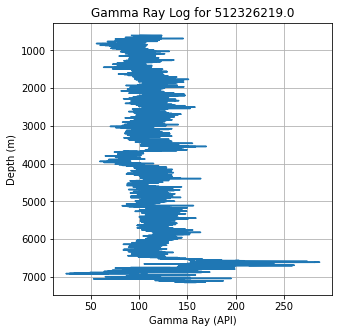

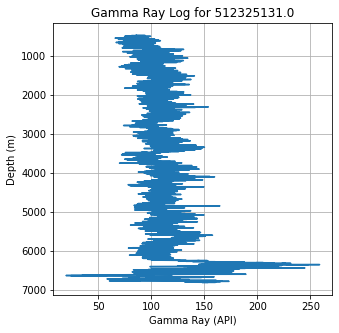

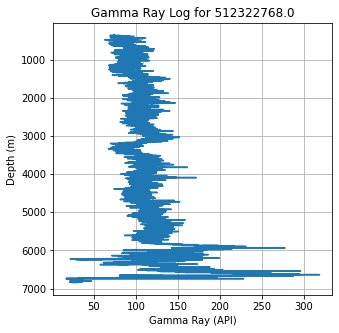

In [4]:
# Select three random well names
well_names = random.sample(log_data['wellName'].unique().tolist(), 3)

# Plot gamma ray log for each well name
for well_name in well_names:
    # Filter the log data for the specific well name
    well_data = log_data.loc[log_data['wellName'] == well_name]
    
    # Plot the gamma ray log for the specific well
    plt.figure(figsize=(5, 5))
    plt.plot(well_data['GR'], well_data['DEPTH'])
    plt.gca().invert_yaxis()  # Invert y-axis to show depth increasing downwards
    plt.xlabel('Gamma Ray (API)')
    plt.ylabel('Depth (m)')
    plt.title('Gamma Ray Log for {}'.format(well_name))
    plt.grid()
    plt.show()

## 1.2 Load Locs

In [5]:
loc_data = pd.read_parquet('/content/data/Training/loc.parquet')
loc_data.head()

,Latitude,Longitude
wellName,,
512320698.0,48.673353,2.145178
512320699.0,48.673353,2.150808
512320928.0,48.698713,2.140728
512320970.0,48.713273,2.150148
512320971.0,48.709603,2.145308


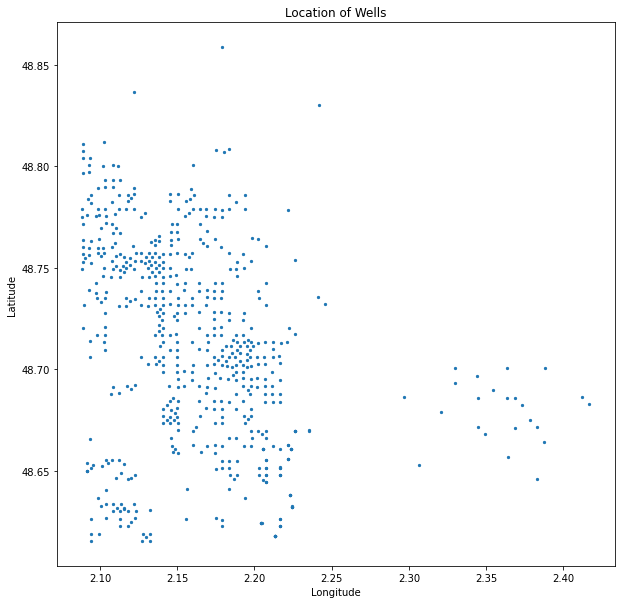

In [6]:
plt.figure(figsize=(10, 10))
plt.scatter(loc_data['Longitude'], loc_data['Latitude'], s=5)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Location of Wells')
plt.show()

## 1.3 Load Tops

### 1.3.1 data analysis 

In [7]:
top_data = pd.read_parquet('/content/data/Training/tops.parquet')
top_data.head()

,MARCEL,CONRAD,SYLVAIN
wellName,,,
512320698.0,6398.0,6661.0,6638.0
512320699.0,6407.0,6676.0,6656.0
512320928.0,6520.0,6793.0,6746.0
512320970.0,6544.0,6816.0,6770.0
512320971.0,6510.0,6789.0,6742.0


In [8]:
top_data.corr()

,MARCEL,CONRAD,SYLVAIN
MARCEL,1.000000,0.982550,0.986383
CONRAD,0.982550,1.000000,0.993895
SYLVAIN,0.986383,0.993895,1.000000


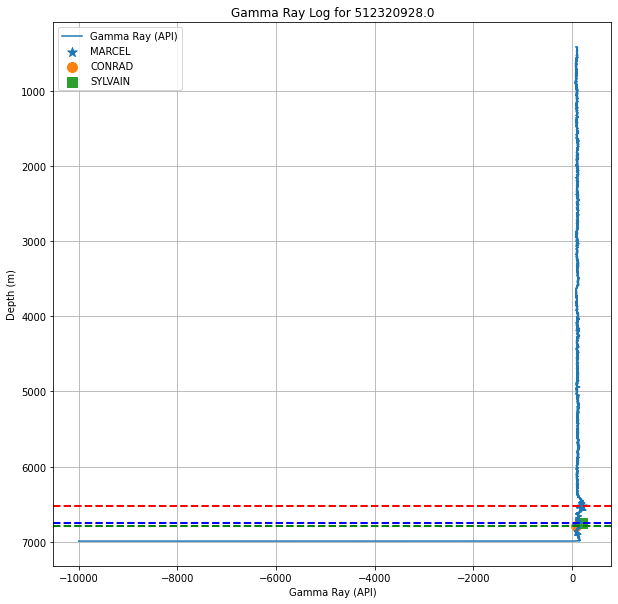

In [9]:
# Select one well name
well_name = 512320928.0

# Filter the log data for the specific well name
well_data = log_data.loc[log_data['wellName'] == well_name]

# Filter the top data for the specific well name
marker = top_data.loc[top_data.index == well_name]

# Plot the gamma ray log for the specific well
plt.figure(figsize=(10, 10))
plt.plot(well_data['GR'], well_data['DEPTH'], label='Gamma Ray (API)')
plt.gca().invert_yaxis()  # Invert y-axis to show depth increasing downwards
plt.xlabel('Gamma Ray (API)')
plt.ylabel('Depth (m)')
plt.title('Gamma Ray Log for {}'.format(well_name))

# Add a marker and line for each of the formations in top_data
formations = ['MARCEL', 'CONRAD', 'SYLVAIN']
markers = ['*', 'o', 's']
colors = ['red', 'green', 'blue']
for i in range(len(formations)):
    depth = marker[formations[i]].values[0]
    if not pd.isna(depth) and depth in well_data['DEPTH'].tolist():
        gr_value = well_data.loc[well_data['DEPTH'] == depth, 'GR'].iloc[0]
        plt.scatter(gr_value, depth, marker=markers[i], s=100, label=formations[i])
        plt.axhline(depth, color=colors[i], linestyle='--', linewidth=2, label='_nolegend_')

plt.legend()
plt.grid()
plt.show()

### 1.3.2 Quality assesement

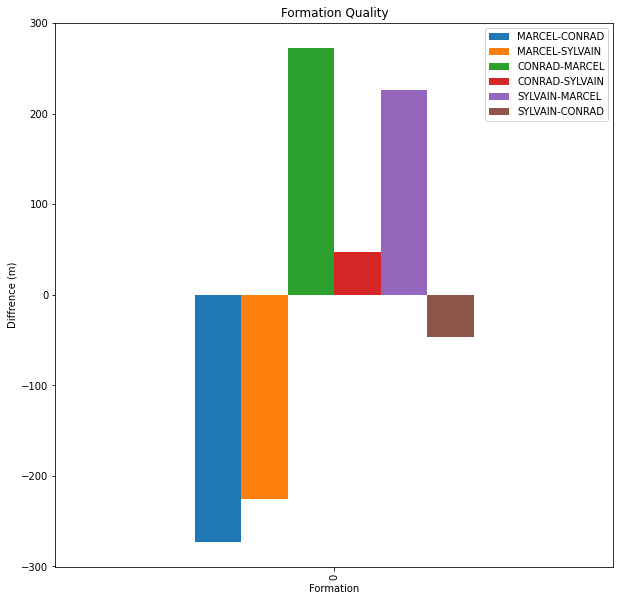

In [10]:
#comparing the mean difference in putting the labels
dic_quality = {}
for i in range(len(formations)):
    for j in range(len(formations)):
        if i != j:
            dic_quality[formations[i] + '-' + formations[j]] = (marker[formations[i]] - marker[formations[j]]).mean()
df_quality = pd.DataFrame(dic_quality, index=[0])
#plot the dataframe
df_quality.plot(kind='bar', figsize=(10, 10))
plt.xlabel('Formation')
plt.ylabel('Diffrence (m)')
plt.title('Formation Quality')
plt.show()

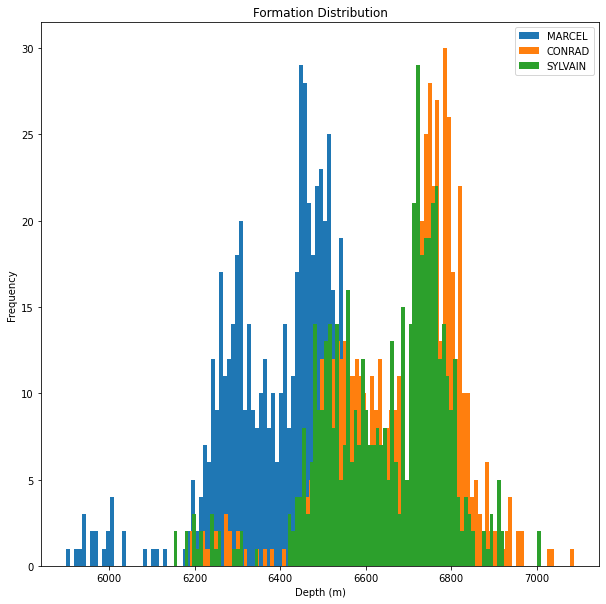

In [11]:
#compare the distributions based on the labeller
bins=100
plt.figure(figsize=(10, 10))
plt.hist(top_data['MARCEL'], bins=bins, label='MARCEL')
plt.hist(top_data['CONRAD'], bins=bins, label='CONRAD')
plt.hist(top_data['SYLVAIN'], bins=bins, label='SYLVAIN')
plt.xlabel('Depth (m)')
plt.ylabel('Frequency')
plt.title('Formation Distribution')
plt.legend()

# 2 . Datasets 

In [12]:
merged_data = pd.merge(log_data, top_data, on='wellName')
merged_data.dropna(inplace=True)
merged_data.head()

,wellName,DEPTH,GR,MARCEL,CONRAD,SYLVAIN
0,512320698.0,421.0,96.9752,6398.0,6661.0,6638.0
1,512320698.0,421.5,102.3324,6398.0,6661.0,6638.0
2,512320698.0,422.0,104.6432,6398.0,6661.0,6638.0
3,512320698.0,422.5,99.2187,6398.0,6661.0,6638.0
4,512320698.0,423.0,92.0200,6398.0,6661.0,6638.0


In [13]:
merged_data.corr()

,wellName,DEPTH,GR,MARCEL,CONRAD,SYLVAIN
wellName,1.000000,-0.010691,-0.004434,-0.167957,-0.189742,-0.160110
DEPTH,-0.010691,1.000000,0.017944,0.031700,0.032032,0.032184
GR,-0.004434,0.017944,1.000000,0.003638,0.004894,0.003713
MARCEL,-0.167957,0.031700,0.003638,1.000000,0.985156,0.986361
CONRAD,-0.189742,0.032032,0.004894,0.985156,1.000000,0.993994
SYLVAIN,-0.160110,0.032184,0.003713,0.986361,0.993994,1.000000


In [13]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GroupShuffleSplit
X = merged_data[['wellName', 'DEPTH', 'GR']]
y = merged_data[['MARCEL', 'CONRAD', 'SYLVAIN']]
groups = merged_data['wellName']

# Use GroupShuffleSplit to split the data by wellName
gss = GroupShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
train_idx, test_idx = next(gss.split(X, y, groups))

X_train = X.iloc[train_idx]
y_train = y.iloc[train_idx]
X_test = X.iloc[test_idx]
y_test = y.iloc[test_idx]

X_train.head()

,wellName,DEPTH,GR
12842,512320699.0,455.0,79.5673
12843,512320699.0,455.5,71.4313
12844,512320699.0,456.0,65.6248
12845,512320699.0,456.5,63.8022
12846,512320699.0,457.0,66.2489


In [37]:
y_train.head()

,MARCEL,CONRAD,SYLVAIN
12842,6407.0,6676.0,6656.0
12843,6407.0,6676.0,6656.0
12844,6407.0,6676.0,6656.0
12845,6407.0,6676.0,6656.0
12846,6407.0,6676.0,6656.0


# 3.Models and evaluation

## 3.1 Linear regression 

In [14]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Train the model 
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test['MARCEL'], y_pred[:,0])
print('Mean squared error for Marcel:', mse)


Mean squared error for Marcel: 23354.22957389715


In [16]:
mse = mean_squared_error(y_test['MARCEL'], y_pred[:,0])
print('Mean squared error for Marcel:', mse)

mse = mean_squared_error(y_test['CONRAD'], y_pred[:,1])
print('Mean squared error for Conrad:', mse)

mse = mean_squared_error(y_test['SYLVAIN'], y_pred[:,2])
print('Mean squared error for Sylvain:', mse)

Mean squared error for Marcel: 23354.22957389715
Mean squared error for Conrad: 23619.31297941996
Mean squared error for Sylvain: 23930.603730140425


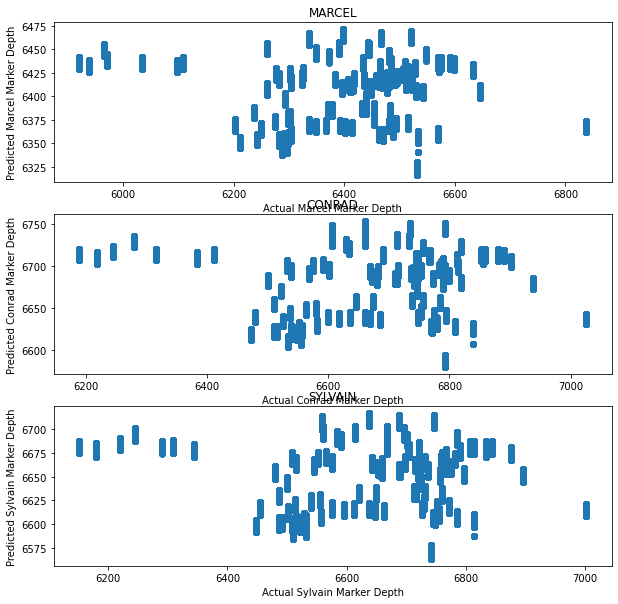

In [17]:
fig, axs = plt.subplots(3, 1, figsize=(10, 10))
axs[0].scatter(y_test['MARCEL'], y_pred[:,0])
axs[0].set_title('MARCEL')
axs[0].set_xlabel('Actual Marcel Marker Depth')
axs[0].set_ylabel('Predicted Marcel Marker Depth')
axs[1].scatter(y_test['CONRAD'], y_pred[:,1])
axs[1].set_title('CONRAD')
axs[1].set_xlabel('Actual Conrad Marker Depth')
axs[1].set_ylabel('Predicted Conrad Marker Depth')
axs[2].scatter(y_test['SYLVAIN'], y_pred[:,2])
axs[2].set_title('SYLVAIN')
axs[2].set_xlabel('Actual Sylvain Marker Depth')
axs[2].set_ylabel('Predicted Sylvain Marker Depth')
plt.show()

## 3.2 Comparing several regression models

• Linear Regression:

-A statistical method used to model the relationship between one or more independent variables and a dependent variable.

-The goal is to find the best linear fit that minimizes the sum of squared residuals between the predicted and actual values.

-Assumes a linear relationship between the independent and dependent variables.

-Regularization techniques such as Lasso, Ridge, and Elastic Net can be applied to prevent overfitting.

• Lasso Regression:

  -A type of linear regression that adds a penalty term to the loss function that shrinks the coefficients towards zero.

  -The penalty term is proportional to the absolute value of the coefficients, resulting in sparse models where some coefficients are exactly zero.

  -Useful for feature selection and reducing the complexity of the model.

• Elastic Net Regression:

  -A combination of Lasso and Ridge regression that adds both L1 and L2 regularization to the loss function.

  -Can handle highly correlated independent variables better than Lasso and provides a balance between feature selection and model complexity.

• Ridge Regression:

  -A type of linear regression that adds a penalty term to the loss function that shrinks the coefficients towards zero.

  -The penalty term is proportional to the squared value of the coefficients, resulting in smaller but non-zero coefficients.

  -Useful for reducing the variance in the model and preventing overfitting.

In [19]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score


# Define a list of regression models to evaluate
models = [
    LinearRegression(),
    Ridge(),
    Lasso(),
    ElasticNet(),
    #DecisionTreeRegressor()
]

# Fit each model to the training data and evaluate its performance on the test data
for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(type(model).__name__)
    print("Mean Squared Error:", mse)
    print("R-squared:", r2)
    print("="*50)

LinearRegression
Mean Squared Error: 23634.715427818835
R-squared: -0.04145672402301548
Ridge
Mean Squared Error: 23634.71542781792
R-squared: -0.04145672402297899
Lasso
Mean Squared Error: 23634.69218690626
R-squared: -0.041455699684218215
ElasticNet
Mean Squared Error: 23634.70369211814
R-squared: -0.04145620677469893


## 3.4 Support vector machines

Support vector machines (SVMs) are a type of supervised learning algorithm used for classification and regression analysis. SVMs work by finding the optimal hyperplane that separates the data into two classes with the maximum margin between them. In other words, SVMs find the decision boundary that maximizes the distance between the closest points from each class, known as support vectors. SVMs can handle non-linearly separable data by using kernel functions to transform the data into a higher-dimensional space where a linear hyperplane can be used for separation. SVMs have several advantages, including their ability to handle high-dimensional data and their ability to generalize well to new data. However, SVMs can be sensitive to the choice of kernel function and the selection of hyperparameters, which can make them difficult to optimize. Additionally, SVMs can be computationally expensive, especially for large datasets.

### Predictions on Marcel

In [38]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

# Define the parameter grid to search
param_grid = {
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'C': [0.1, 1, 10],
    'epsilon': [0.01, 0.1, 1],
}

# Create a SVM model
svm_model = SVR()

# Use GridSearchCV to find the best parameters
svm_grid = GridSearchCV(svm_model, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
svm_grid.fit(X_train, y_train['MARCEL'])

# Print the best parameters and score
print('Best parameters:', svm_grid.best_params_)
print('Best score:', svm_grid.best_score_)

# Use the best model to predict on the test data
y_pred = svm_grid.predict(X_test)

# Print the mean squared error on the test data
print('Mean Squared Error:', mean_squared_error(y_test['MARCEL'], y_pred))

KeyboardInterrupt: ignored

## 3.3 simple neural network

In [30]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

# Convert the data to NumPy arrays
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

# Convert the data to PyTorch tensors
X_train = torch.from_numpy(X_train).float()
X_test = torch.from_numpy(X_test).float()
y_train = torch.from_numpy(y_train).float()
y_test = torch.from_numpy(y_test).float()

# Create the data loaders
batch_size = 32
train_dataset = TensorDataset(X_train, y_train)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_dataset = TensorDataset(X_test, y_test)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [31]:
# Define the neural network
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(X_train.shape[1], 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 3)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [32]:
# Move the model and data to the GPU (if available)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = Net().to(device)
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

# Define the optimizer and loss function
optimizer = optim.Adam(model.parameters(), lr=0.001)
criterion = nn.MSELoss()


In [33]:
# Train the model
num_epochs = 10
for epoch in range(num_epochs):
    train_loss = 0.0
    test_loss = 0.0
    model.train()  # set the model to train mode

    # Train the model on the training set
    for batch_idx, (inputs, targets) in enumerate(train_loader):
        # Move the data to the GPU
        inputs, targets = inputs.to(device), targets.to(device)

        # Zero the gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, targets)

        # Backward pass
        loss.backward()
        optimizer.step()
        # Update the training loss
        train_loss += loss.item() * inputs.size(0)

    # Calculate the average training loss
    train_loss /= len(train_loader.dataset)

    # Evaluate the model on the testing set
    model.eval()  # set the model to evaluation mode
    with torch.no_grad():
        for batch_idx, (inputs, targets) in enumerate(test_loader):
            # Move the data to the GPU
            inputs, targets = inputs.to(device), targets.to(device)

            # Forward pass
            outputs = model(inputs)
            loss = criterion(outputs, targets)

            # Update the testing loss
            test_loss += loss.item() * inputs.size(0)

        # Calculate the average testing loss
        test_loss /= len(test_loader.dataset)

    # Print the epoch and losses
    print(f"Epoch {epoch+1}/{num_epochs}, Train Loss: {train_loss:.4f}, Test Loss: {test_loss:.4f}")

Epoch 1/10, Train Loss: 14035796497.3000, Test Loss: 41656193.4744


KeyboardInterrupt: ignored

# 4.Implement the inference

In [17]:
#similar to the training data but for the validation data
log_data_val = pd.read_parquet('data/Validation/logs_100.parquet')
loc_data_val = pd.read_parquet('data/Validation/loc_100.parquet')
top_data_val = pd.read_csv('data/Validation/tops_100.csv')

#make X_val and y_val
#use the wellname as index
df_log_val = pd.merge(log_data_val, top_data_val, on='wellName')
X_val = df_log_val.drop(['MARCEL','CONRAD','SYLVAIN'],axis=1)
y_val = df_log_val[['MARCEL','CONRAD','SYLVAIN']]
#predict the y_val
y_pred_val = model.predict(X_val)
#calculate the mse
mse = mean_squared_error(y_val['MARCEL'], y_pred_val[:,0])
print('Mean squared error for Marcel:', mse)

mse = mean_squared_error(y_val['CONRAD'], y_pred_val[:,1])
print('Mean squared error for Conrad:', mse)

mse = mean_squared_error(y_val['SYLVAIN'], y_pred_val[:,2])
print('Mean squared error for Sylvain:', mse)

Mean squared error for Marcel: 13791.981415521439
Mean squared error for Conrad: 14783.193663674496
Mean squared error for Sylvain: 15097.542761814804


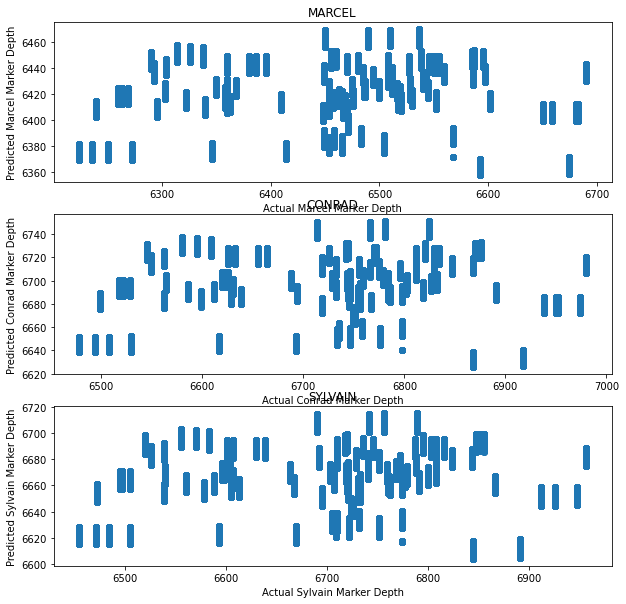

In [18]:
fig, axs = plt.subplots(3, 1, figsize=(10, 10))
axs[0].scatter(y_val['MARCEL'], y_pred_val[:,0])
axs[0].set_title('MARCEL')
axs[0].set_xlabel('Actual Marcel Marker Depth')
axs[0].set_ylabel('Predicted Marcel Marker Depth')
axs[1].scatter(y_val['CONRAD'], y_pred_val[:,1])
axs[1].set_title('CONRAD')
axs[1].set_xlabel('Actual Conrad Marker Depth')
axs[1].set_ylabel('Predicted Conrad Marker Depth')
axs[2].scatter(y_val['SYLVAIN'], y_pred_val[:,2])
axs[2].set_title('SYLVAIN')
axs[2].set_xlabel('Actual Sylvain Marker Depth')
axs[2].set_ylabel('Predicted Sylvain Marker Depth')
plt.show()